The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dataset : __yolo_datasets__/train_dataset
sub_dataset: 	 __yolo_datasets__/train_dataset/sentan_dataset_sentan_dataset


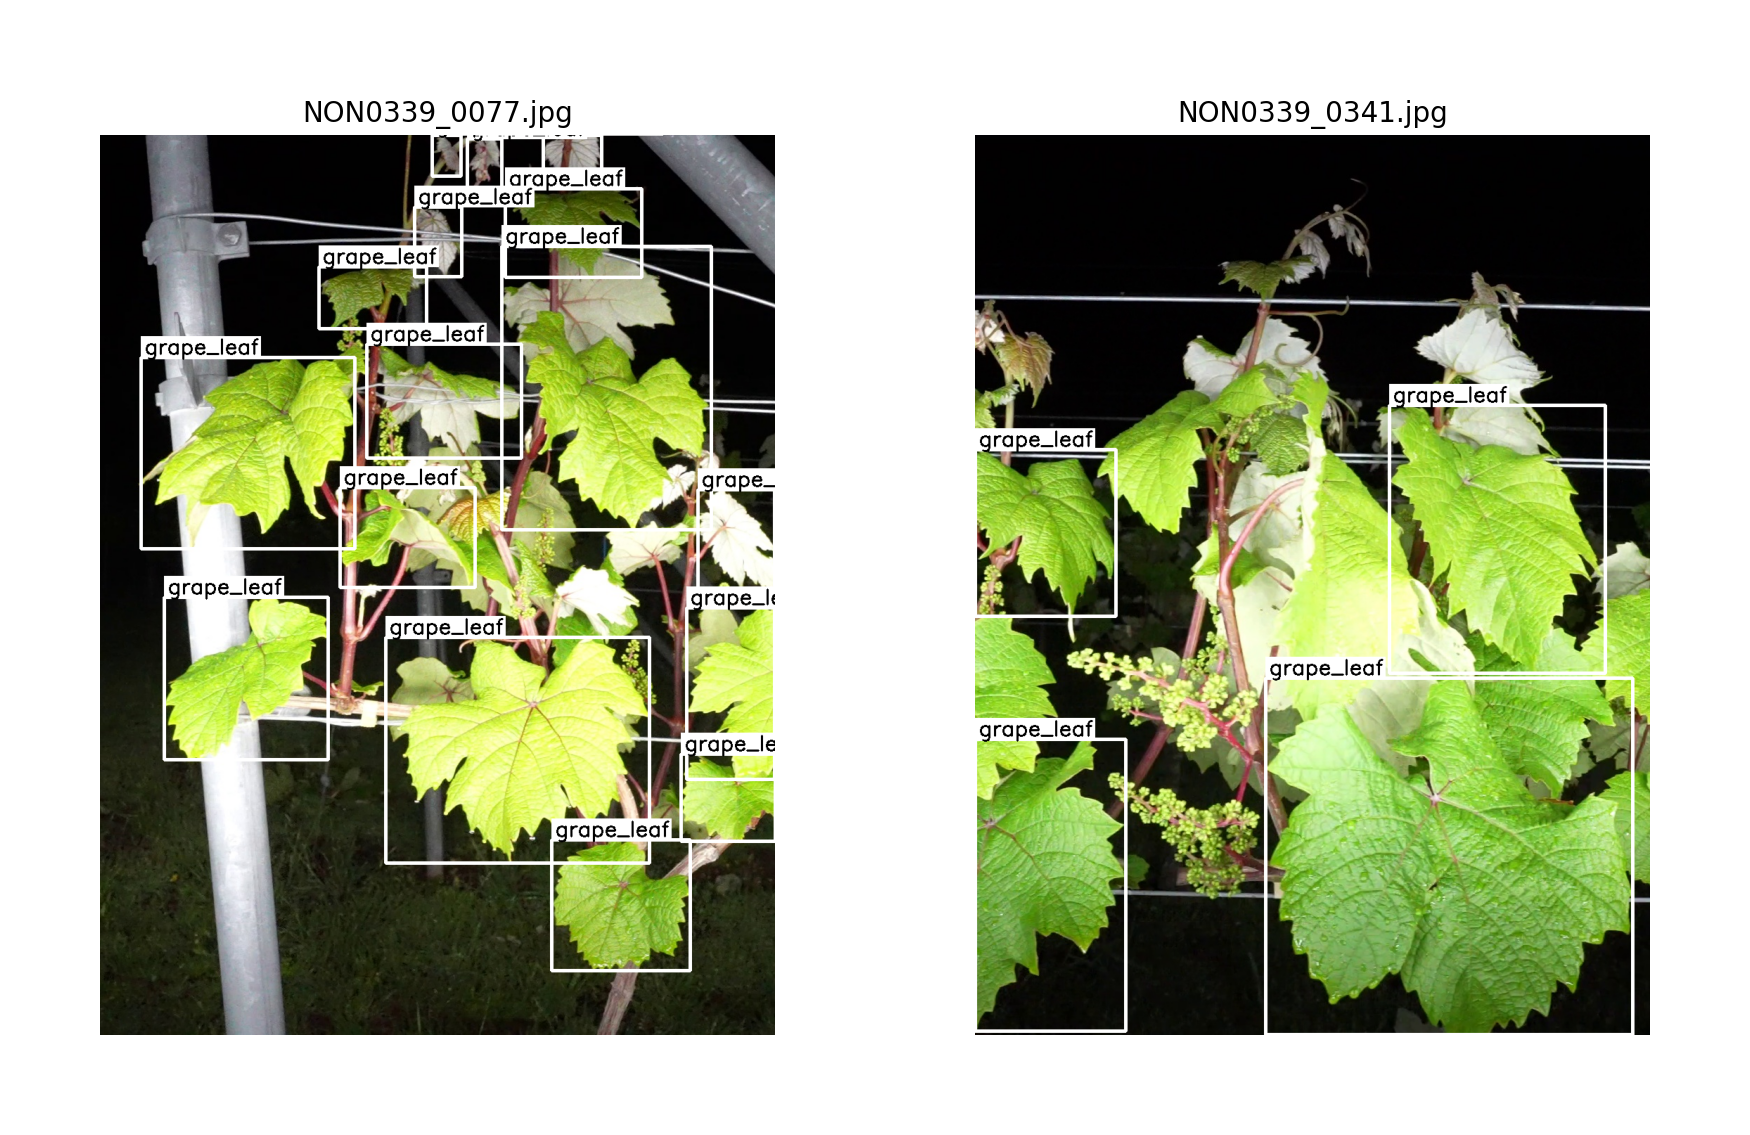

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import random
from pathlib import Path
import bbox_visualizer as bbv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show_imgs(imgs_dict:dict, ncol=0, dpi=200, font_scale=0.7):
    font_size = int(plt.rcParams["font.size"]*font_scale)

    if ncol > 0:
        nrow = ((len(imgs_dict)-1)//ncol)+1
    else:
        nrow = 1
        ncol = len(imgs_dict)

    img_num = len(imgs_dict)
    fig = plt.figure(figsize=(float(img_num), float(img_num)), dpi=dpi)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrow, ncol), axes_pad=0.2,)

    for i in range(nrow*ncol):
        grid[i].axis('off')
        if i < len(imgs_dict):
            img_key = list(imgs_dict.keys())[i]
            grid[i].imshow(cv2.cvtColor(imgs_dict[img_key], cv2.COLOR_BGR2RGB))
            grid[i].set_title(img_key, fontsize=font_size, color='black', pad=int(font_size/2))
    
    plt.show(); plt.close()
    return None

def check_yolo_dataset(dataset_dir, sample_num=5):
    if not isinstance(dataset_dir, Path):
      dataset_dir = Path(dataset_dir)

    print(f"dataset : {str(dataset_dir)}")

    for sub_dataset in dataset_dir.glob("*"):

      category_txt = sub_dataset.glob("*cat*.txt").__next__()
      categories = []
      with open(str(category_txt)) as f:
        categories = f.read().splitlines()
        categories = [""] + [i.split(": ")[-1] for i in categories]

      print("sub_dataset: \t", str(sub_dataset))

      image_dir    = sub_dataset.glob("*image*").__next__()
      label_dir    = sub_dataset.glob("*label*").__next__()
      
      image_paths = list(image_dir.glob("*"))
      if len(image_paths) < sample_num:
        sample_num = len(image_paths)

      imgs_dict = {}
      for img_path in random.sample(image_paths, sample_num):
        img = cv2.imread(str(img_path))
        
        label_path = str(label_dir/(img_path.name.split(".")[0]+".txt"))
        labels, bboxes = [], []
        with open(label_path) as f:
          annos = [l.split(" ") for l in f.read().splitlines()]
          for ann in annos:
            ann = list(map(float, ann))
            cls, center_x, center_y, width, height = ann
            cx, cy, w, h = (int(center_x*img.shape[1]), int(center_y*img.shape[0]), int(width*img.shape[1]), int(height*img.shape[0]))

            labels.append(str(categories[int(cls)]))
            bboxes.append([int(cx-(w/2)), int(cy-(h/2)), int(cx+(w/2)), int(cy+(h/2))])
        
            
        img = bbv.draw_multiple_rectangles(img, bboxes)
        img = bbv.add_multiple_labels(img, labels, bboxes)
        imgs_dict[img_path.name] = img

      show_imgs(imgs_dict, dpi=1000, font_scale=0.2)

    return

def main():
  yolo_dataset_path = [
    Path("./__yolo_datasets__/train_dataset/"),
  ]

  for dataset in yolo_dataset_path:
    print("====================")
    check_yolo_dataset(dataset, sample_num=2)
    print("====================")



if __name__ == '__main__':
  main()
